In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [14]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [15]:
df = pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\Results\Predicted District Wise\\1.xlsx")

In [16]:
df

,Unnamed: 0,District,Slope,Soil Type,LULC,Max Temperature,Min Temperature,Precipitation,Groundwater Recharge,Predicted,Year
0,0,Faridkot,0.496398,1,Agriculture,42.902,21.724,74.26,-0.09,-0.219801,1986
1,1,Faridkot,0.496398,1,Agriculture,45.352,23.562,39.16,0.83,0.314173,1987
2,2,Faridkot,0.496398,1,Agriculture,41.710,22.326,120.64,-1.48,-0.531946,1988
3,3,Faridkot,0.496398,1,Agriculture,43.788,22.494,79.64,0.30,-0.200163,1989
4,4,Faridkot,0.496398,1,Agriculture,42.016,22.742,105.90,-0.80,-0.422881,1990
5,5,Faridkot,0.496398,1,Agriculture,43.132,22.458,58.66,0.65,-0.118513,1991
6,6,Faridkot,0.496398,1,Agriculture,41.538,22.258,86.86,-0.33,-0.244119,1992
7,7,Faridkot,0.496398,1,Agriculture,43.544,22.690,73.10,-0.27,-0.359129,1993
8,8,Faridkot,0.496398,1,Agriculture,40.554,21.804,66.78,-0.85,-0.270014,1994
9,9,Faridkot,0.496398,1,Agriculture,42.400,21.976,104.20,-1.12,-0.267144,1995


In [17]:
df=df.drop('Unnamed: 0',axis=1)

In [21]:
df=df.set_index('Year')

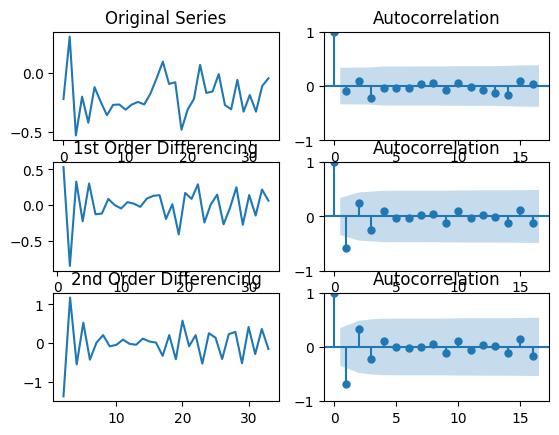

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df.Predicted)
axes[0, 0].set_title('Original Series')
plot_acf(df.Predicted, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(df.Predicted.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Predicted.diff().dropna(), ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(df.Predicted.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Predicted.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

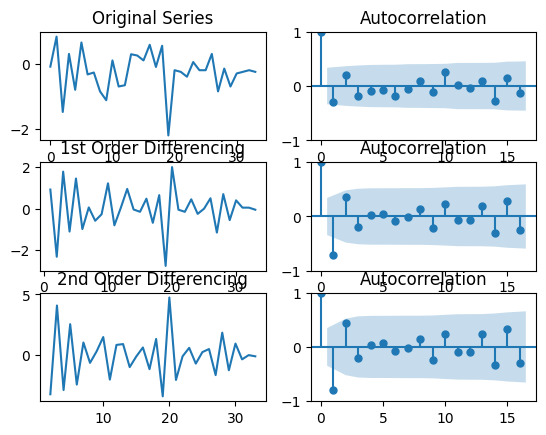

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df['Groundwater Recharge'])
axes[0, 0].set_title('Original Series')
plot_acf(df['Groundwater Recharge'], ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(df['Groundwater Recharge'].diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Groundwater Recharge'].diff().dropna(), ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(df['Groundwater Recharge'].diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Groundwater Recharge'].diff().diff().dropna(), ax=axes[2, 1])
plt.show()

In [11]:
import statsmodels.api as sm

In [22]:
df.index = pd.to_datetime(df.index, format='%Y')

In [33]:
train_data = df.loc[:'2011']
test_data = df.loc['2012':]

In [34]:
model = sm.tsa.arima.ARIMA(train_data['Predicted'],order=(1, 1, 1))
result = model.fit()

b:\code\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
b:\code\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
b:\code\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [35]:
y_pred = result.forecast(len(test_data))

In [37]:
mse = mean_squared_error(test_data['Groundwater Recharge'], y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.1862148099597807


In [38]:
y_pred

2012-01-01   -0.064116
2013-01-01   -0.013520
2014-01-01   -0.058035
2015-01-01   -0.018870
2016-01-01   -0.053329
2017-01-01   -0.023011
2018-01-01   -0.049685
2019-01-01   -0.026217
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [40]:
n = [3, 4, 5, 12, 13, 14, 23, 24, 25, 44]
for i in range(1, 76):
    df2 = pd.DataFrame()
    if i not in n:
        df = pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\Results\Predicted District Wise\\" + str(1) + ".xlsx")
        df=df.drop('Unnamed: 0',axis=1)
        df=df.set_index('Year')
        df.index = pd.to_datetime(df.index, format='%Y')
        model = sm.tsa.arima.ARIMA(df['Predicted'],order=(1, 1, 1))
        result = model.fit()
        y_pred = result.forecast(10)
        y_pred.to_excel(str(i)+"_forecast.xlsx")

b:\code\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
b:\code\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
b:\code\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
b:\code\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
b:\code\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, f